Sample Data:
         Date  ALLSKY_SFC_SW_DWN  CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  \
0  2024-01-03              15.92              19.33               6.94   
1  2024-01-04              14.71              19.47               4.60   
2  2024-01-05              16.87              19.72              10.55   
3  2024-01-06              18.77              20.26              13.15   
4  2024-01-07              18.04              20.18              11.29   

   ALLSKY_SFC_SW_DIFF   PSH    T2M  CLOUD_AMT  AOD_55   RH2M  WS2M  
0                9.02  0.38  27.96      47.62    0.64  83.46  2.22  
1                8.64  0.35  28.18      65.96    0.61  82.49  2.05  
2                8.19  0.41  27.89      52.12    0.54  84.42  1.91  
3                8.81  0.45  27.93      15.74    0.47  83.29  1.65  
4                9.30  0.43  28.00      32.12    0.47  84.24  1.70  

Missing Values:
Date                  0
ALLSKY_SFC_SW_DWN     0
CLRSKY_SFC_SW_DWN     0
ALLSKY_SFC_SW_DNI     0
ALLSKY_SFC_SW_D

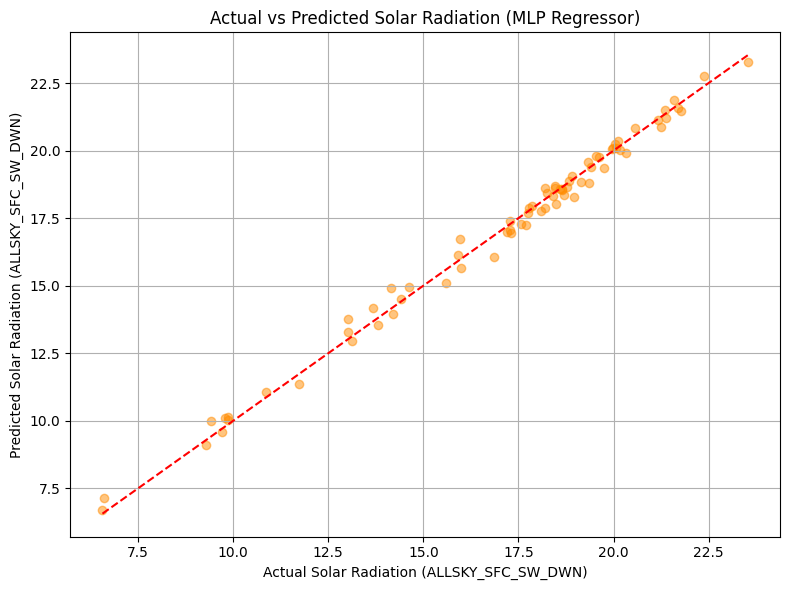

In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load Datasetcsv
file_path = '/content/nasa_power_data_all_params.csv'
df = pd.read_csv(file_path)

# 3. Preview and Clean Data
print("Sample Data:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values
df = df.dropna()

# 4. Define Features and Target
# Update this if your target column is different (e.g. 'ALLSKY_SFC_SW_DWN')
target_col = 'ALLSKY_SFC_SW_DWN'
X = df.drop(columns=[target_col, 'Date'])
y = df[target_col]

# 5. Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 7. Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                   max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# 8. Predict and Inverse Transform
y_pred_scaled = mlp.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 9. Evaluate Model
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print("\nMLP Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 10. Visualize Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='darkorange')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel("Actual Solar Radiation (ALLSKY_SFC_SW_DWN)")
plt.ylabel("Predicted Solar Radiation (ALLSKY_SFC_SW_DWN)")
plt.title("Actual vs Predicted Solar Radiation (MLP Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()